<a href="https://colab.research.google.com/github/brieueu/Roblox_data/blob/main/Roblox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

José Gabriel

In [1]:
import kagglehub

path = kagglehub.dataset_download("biggiefats/roblox-games-dataset")

print("Path to dataset files:", path)

100%|██████████| 40.0k/40.0k [00:00<00:00, 29.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/biggiefats/roblox-games-dataset/versions/1


In [2]:
import os

files = os.listdir(path)
print("Files in the downloaded directory:", files)

Files in the downloaded directory: ['roblox_games.csv']


In [3]:
import pandas as pd
import os

file_path = os.path.join(path, 'roblox_games.csv')
df = pd.read_csv(file_path)
display(df)

,Rank,Name,Active,Visits,Favourites,Likes,Dislikes,Rating
0,#1,Blox Fruits,"483,372","41,346,317,182","13,574,097","8,521,670","676,846",92.64
1,#2,Brookhaven 🏡RP,"474,141","55,635,148,446","22,117,653","6,108,763","955,845",86.47
2,#3,Dress To Impress 💜,"297,764","3,876,511,994","3,182,036","2,042,092","188,403",91.55
3,#4,PETS GO! ✨ [NEW],"172,411","145,691,211","199,254","275,267","20,140",93.18
4,#5,Murder Mystery 2,"159,531","18,310,453,247","19,306,585","8,001,198","786,705",91.05
...,...,...,...,...,...,...,...,...
995,#996,[MOBILE/CONSOLE FIXED - BETA] The Time of Ninja,706,"5,136,808","80,497","25,291","2,841",89.90
996,#997,TEAM BORRY PRISON BREAKOUT!👮 [TEAMWORK OBBY],705,"68,323,047","15,351","1,397",586,70.45
997,#998,[👻HALLOWEEN] ADC DANCE STUDIO,704,"11,811,628","8,996","4,344",429,91.01
998,#999,🏈 Field Goal Simulator,703,"43,992,091","411,025","37,371","6,273",85.63


# Tratando a base de dados

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   object 
 1   Name        1000 non-null   object 
 2   Active      1000 non-null   object 
 3   Visits      1000 non-null   object 
 4   Favourites  1000 non-null   object 
 5   Likes       1000 non-null   object 
 6   Dislikes    1000 non-null   object 
 7   Rating      1000 non-null   float64
dtypes: float64(1), object(7)
memory usage: 62.6+ KB


In [5]:
print(df.duplicated().sum())
df = df.drop_duplicates()

20


In [6]:
colunas = ["Active", "Visits", "Favourites", "Likes", "Dislikes"]
df[colunas] = (
    df[colunas]
    .replace(",", "", regex=True)
    .fillna(0)
    .astype(int)
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 980 entries, 0 to 999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        980 non-null    object 
 1   Name        980 non-null    object 
 2   Active      980 non-null    int64  
 3   Visits      980 non-null    int64  
 4   Favourites  980 non-null    int64  
 5   Likes       980 non-null    int64  
 6   Dislikes    980 non-null    int64  
 7   Rating      980 non-null    float64
dtypes: float64(1), int64(5), object(2)
memory usage: 68.9+ KB


/tmp/ipython-input-6-2236612389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colunas] = (


In [7]:
df.describe()

,Active,Visits,Favourites,Likes,Dislikes,Rating
count,980.000000,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,980.000000
mean,5740.914286,6.187385e+08,1.366779e+06,3.190956e+05,4.201369e+04,84.000041
std,26854.206570,2.910298e+09,2.944163e+06,7.636325e+05,1.052715e+05,11.187615
min,703.000000,2.819800e+04,2.720000e+02,9.000000e+00,6.000000e+00,25.550000
25%,936.000000,2.165823e+07,8.506675e+04,2.003725e+04,3.203750e+03,79.352500
50%,1383.500000,8.879432e+07,3.538905e+05,7.808500e+04,1.056550e+04,86.600000
75%,2785.750000,3.744233e+08,1.223882e+06,2.779488e+05,3.676525e+04,91.900000
max,483372.000000,5.563515e+10,2.797108e+07,8.521670e+06,1.441230e+06,98.590000


# Analyze

In [8]:
# Ordenações dos
Top_ativos = df.sort_values(by="Active", ascending=False)
Top_visitas = df.sort_values(by="Visits", ascending=False)
Top_favoritos = df.sort_values(by="Favourites", ascending=False)
Top_gostos = df.sort_values(by="Likes", ascending=False)
Top_desgostos = df.sort_values(by="Dislikes", ascending=False)
Top_classificacao = df.sort_values(by="Rating", ascending=False)


/tmp/ipython-input-9-2082821370.py:24: UserWarning: Glyph 127969 (\N{HOUSE WITH GARDEN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-9-2082821370.py:24: UserWarning: Glyph 128156 (\N{PURPLE HEART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-9-2082821370.py:24: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-9-2082821370.py:24: UserWarning: Glyph 127875 (\N{JACK-O-LANTERN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-9-2082821370.py:24: UserWarning: Glyph 127809 (\N{MAPLE LEAF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127969 (\N{HOUSE WITH GARDEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128156 (\N{PURPL

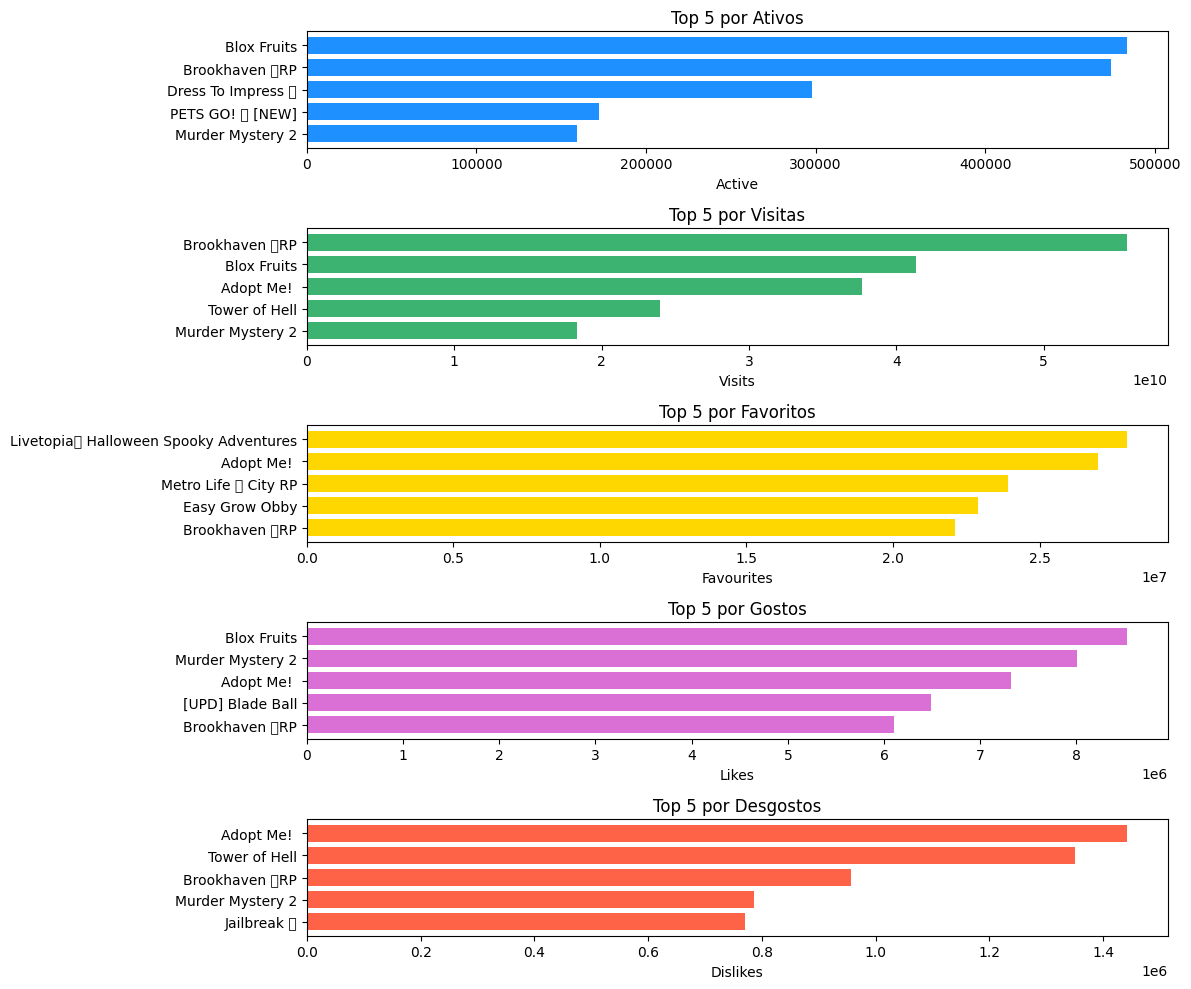

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de tuplas: (título, DataFrame, coluna de interesse, cor)
top_listas = [
    ("Ativos", Top_ativos, "Active", "dodgerblue"),
    ("Visitas", Top_visitas, "Visits", "mediumseagreen"),
    ("Favoritos", Top_favoritos, "Favourites", "gold"),
    ("Gostos", Top_gostos, "Likes", "orchid"),
    ("Desgostos", Top_desgostos, "Dislikes", "tomato"),
]

plt.figure(figsize=(12, 10))  # largura x altura

# Loop para gerar os gráficos um embaixo do outro
for i, (titulo, df_top, coluna, cor) in enumerate(top_listas, 1):
    plt.subplot(len(top_listas), 1, i)  # nrows, ncols, index
    top5 = df_top.head(5)
    plt.barh(top5["Name"], top5[coluna], color=cor)
    plt.xlabel(coluna)
    plt.title(f"Top 5 por {titulo}")
    plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()



Retenção é a quantidade de pessoa visitaram o jogo pela quantidade de Active

In [16]:
df["Retencao"] = df["Active"] / df["Visits"].replace(0, 1)
Top_retencao = df.sort_values(by="Retencao", ascending=False)
print("Top jogos por retenção (ativos / visitas):")
display(Top_retencao.head())


Top jogos por retenção (ativos / visitas):


,Rank,Name,Active,Visits,Favourites,Likes,Dislikes,Rating,Retencao
901,#902,Destroy Grandma,777,28198,281,78,13,85.71,0.027555
577,#578,Pokemon Brick Bronze | Bronze Reborn,1212,124153,1069,288,44,86.75,0.009762
340,#341,Pokemon Brick Bronze | Roria Conquest,2172,261636,3035,880,61,93.52,0.008302
254,#255,😈 TRAITOR!,2960,369074,34724,212,49,81.23,0.008020
140,#141,BACK! / MMV,5222,790643,54804,805,39,95.38,0.006605


Relação de Likes de Deslikes

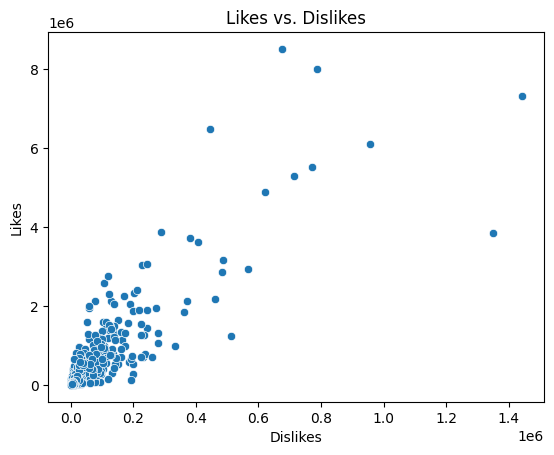

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x="Dislikes", y="Likes")
plt.title("Likes vs. Dislikes")
plt.show()


Jogos com alto engajamento.

In [18]:
# Jogos com alta retenção (por exemplo, top 100)
Top_retencao = df.sort_values(by="Retencao", ascending=False).head(100)

# Interseção dos nomes em várias métricas
names = (
    set(Top_favoritos["Name"])
    & set(Top_retencao["Name"])
    & set(Top_visitas["Name"])
    & set(Top_gostos["Name"])
)

print("Games with high engagement (including retention, excluding rating):")
df_top3games = df[df["Name"].isin(names)]
display(df_top3games)


Games with high engagement (including retention, excluding rating):


,Rank,Name,Active,Visits,Favourites,Likes,Dislikes,Rating,Retencao
3,#4,PETS GO! ✨ [NEW],172411,145691211,199254,275267,20140,93.18,0.001183
16,#17,[🎃] Fisch,44174,23455912,149970,74557,9433,88.77,0.001883
35,#36,🎃 Hide or Die!,24358,34061192,1326949,17487,4724,78.73,0.000715
46,#47,Block Tales [Demo 3],17206,28457911,350351,187661,7592,96.11,0.000605
49,#50,The Haunt,16430,27980878,67134,45719,19454,70.15,0.000587
...,...,...,...,...,...,...,...,...,...
985,#986,Impossible Troll Bridge (Squid Game),712,1519955,181122,731,109,87.02,0.000468
986,#987,🎀 KUROMI'S PRISON RUN! (Obby),709,782873,132611,9,6,60.00,0.000906
989,#990,Backstreets 👊,707,1037973,3472,505,188,72.87,0.000681
990,#991,[🔥NEW!] FORTBLOX,707,715978,2517,972,183,84.16,0.000987
